In [2]:
import numpy as np
import matplotlib.pyplot as plt

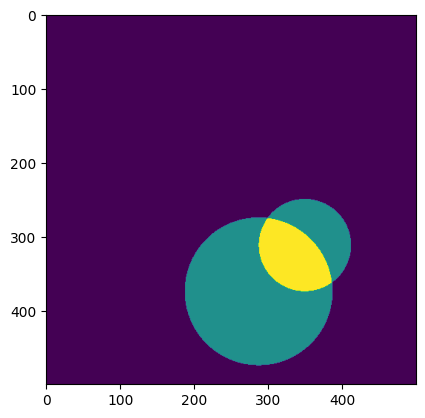

In [8]:
i = np.linspace(-2, 2, 500)
j = i
ii,jj = np.meshgrid(i, j, indexing="ij")

# ij
s1 = (0.5, 0.8, 0.5)
s2 = (1.0, 0.3, 0.8)

im1 = np.where( (s1[0]-ii)**2+(s1[1]-jj)**2 < s1[2]**2, 1, 0)
im2 = np.where( (s2[0]-ii)**2+(s2[1]-jj)**2 < s2[2]**2, 1, 0)
plt.imshow(im1+im2)

209509.53377330207 0.0


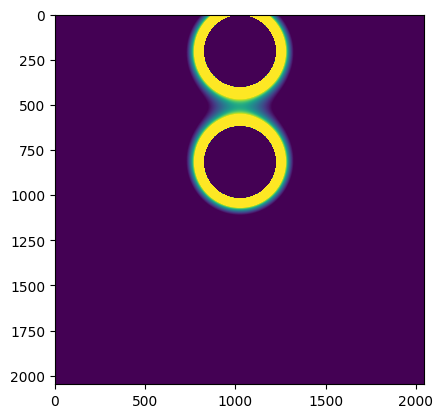

In [154]:
i = np.linspace(-5, 5, 2048)
j = i
ii,jj = np.meshgrid(i, j, indexing="ij")

# ij
s1 = (-4.0, 0.0, 1.0)
s2 = (-1.0, 0.0, 1.0)

r1 = (s1[0]-ii)**2 + (s1[1]-jj)**2 - s1[2]
r2 = (s2[0]-ii)**2 + (s2[1]-jj)**2 - s2[2]

im1 = 1/r1
im2 = 1/r2

im = (im1+im2) -1
im[im<0] = 0

print(im.max(), im.min())

#plt.contour(im)
plt.imshow(im, vmin=0, vmax=1)

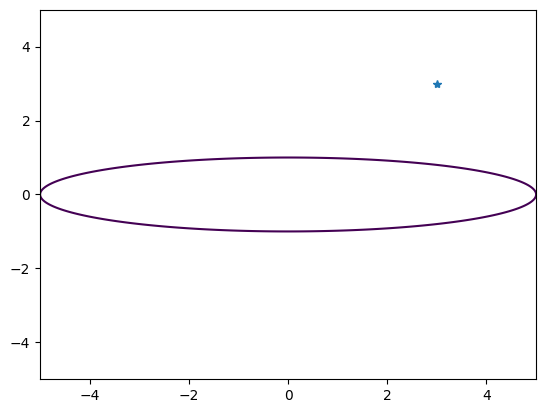

In [166]:
i = np.linspace(-5, 5, 2048)
j = i
xx,yy = np.meshgrid(i, j, indexing="xy")

a = 5
b = 1

plt.contour((xx**2)/(a**2) + (yy**2)/(b**2), levels=[1], extent=[-5,5,-5,5])

p = (3.0, 3.0)
plt.plot(p[0], p[1], "*")





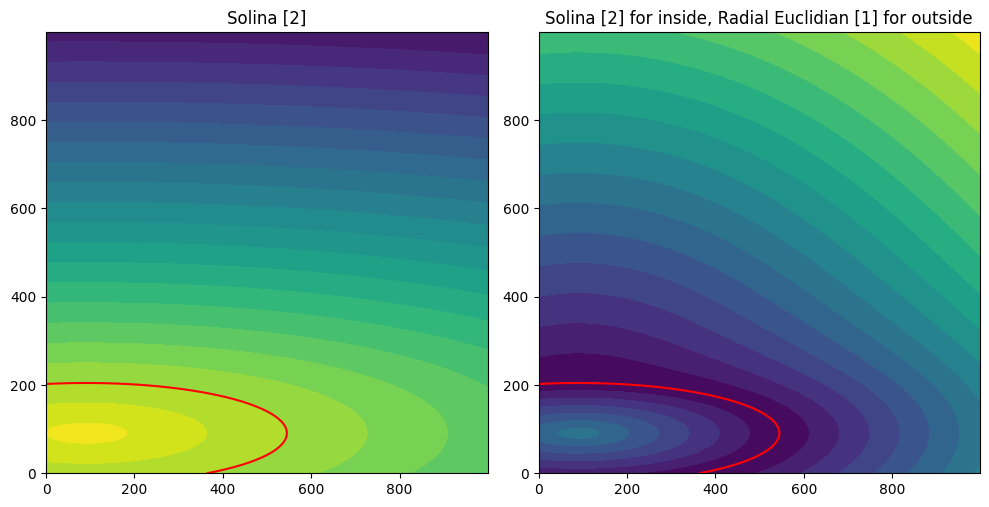

In [190]:
def f(x_,y_,z_,a,b,c):
    x = np.abs(x_)
    y = np.abs(y_)
    z = np.abs(z_)
    return ((x/a)**2 + (y/b)**2 ) + (z/c)**2

a = np.linspace(-0.2, 2, 1000)
b = np.linspace(-0.2, 2, 1000)
ii, jj = np.meshgrid(a, b)

a = 1
b = 1
c = 0.25
f_ = f(ii,0.0,jj,a,b,c)

cost1 = 1 - f_**(1/2)
cost2 = np.where(f_<1, 1 - f_**(1/2), np.sqrt(ii**2+jj**2) * np.abs(1 - f_**(-1/2)) )

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.contourf(cost1, levels=20)
ax1.contour(f_, levels=[1], colors="red")
ax1.set_aspect(1)
ax1.set_title("Solina [2]")

ax2.contourf(cost2, levels=20)
ax2.contour(f_, levels=[1], colors="red")
ax2.set_aspect(1)
ax2.set_title("Solina [2] for inside, Radial Euclidian [1] for outside")

fig.tight_layout()

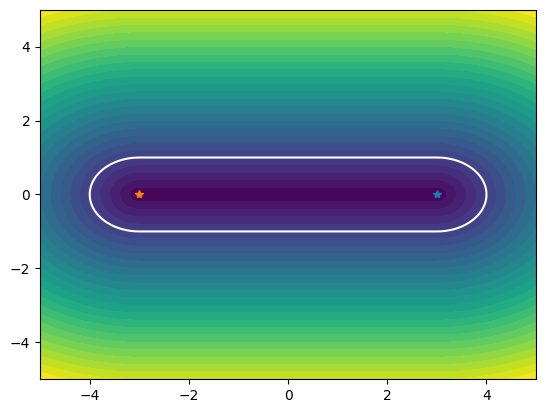

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def project_point(pq,p1,p2):
  e1 = (p2[0] - p1[0], p2[1] - p1[1])
  e2 = (pq[0] - p1[0], pq[1] - p1[1])
  val = e1[0]*e2[0] + e1[1]*e2[1]
  len2 = e1[0]**2 + e1[1]**2;
  is_on_segment = isProjectedPointOnLineSegment(e1,val)
  return ((p1[0] + (val * e1[0]) / len2), (p1[1] + (val * e1[1]) / len2)) , is_on_segment

def isProjectedPointOnLineSegment(e1, val):
  recArea = e1[0]**2 + e1[1]**2
  return val > 0 and val < recArea

def line_segment_dist(pq,p1,p2):
  pp, is_on_segment = project_point(pq,p1,p2)

  d1_2 = (p1[0]-pq[0])**2 + (p1[1]-pq[1])**2
  d2_2 = (p2[0]-pq[0])**2 + (p2[1]-pq[1])**2

  if is_on_segment:
    return abs((p2[0]-p1[0])*(p1[1]-pq[1]) - (p1[0]-pq[0])*(p2[1]-p1[1])) / ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5
  else:
    if d1_2>d2_2:
      return d2_2**0.5
    else:
      return d1_2**0.5


i = np.linspace(-5, 5, 128)
j = i
xx,yy = np.meshgrid(i, j, indexing="xy")

p1 = (0,3)
p2 = (0,-3)

plt.plot(p1[1],p1[0], "*")
plt.plot(p2[1],p2[0], "*")

zz = np.zeros((128,128))

for i in range(128):
  for j in range(128):
    pq = (xx[i,j], yy[i,j])
    zz[i,j] = line_segment_dist(pq,p1,p2)

plt.contourf(zz.T, extent=[-5,5,-5,5], levels=32)
plt.contour(zz.T, extent=[-5,5,-5,5], levels=[1], colors=["white"])
